In [6]:
!apt-get update -y && apt-get -y install sudo file git gcc g++ curl > /dev/null

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease    
Fetched 229 kB in 1s (328 kB/s)
Reading package lists... Done


In [2]:
# {tag_count_threshod}回以上出現したタグのみを対象にする
import pandas as pd
import os

# load dataset
home = os.environ.get('HOME')
df = pd.read_table(f'{home}/data/qiita_2018_tag.tsv', low_memory=False)
# 負荷制御
# df = df[:1000]
print(df)
# タグの出現回数をカウント
tag_counts = df['tags'].str.split(expand=True).stack().value_counts()

# 出現回数が5以上のタグを選択
tag_count_threshod = 5
filtered_tags = tag_counts[tag_counts >= tag_count_threshod].index

# タグをフィルタリング
df['filtered_tags'] = df['tags'].apply(lambda x: ' '.join([tag for tag in str(x).split() if tag in filtered_tags]))

print(df['filtered_tags'])

# df = df.drop(['tags'], axis=1)

                                                    tags
0                                              Xcode iOS
1                                        数学 最適化 シンギュラリティ
2                            Node.js RaspberryPi npm IoT
3                            C# C++CLI mkl 速度比較 .NETCore
4                               PHP C++ C# OpenCV Conoha
...                                                  ...
90308                         Go Linux Network multicast
90309                                       USB 大晦日ハッカソン
90310                          Lua AdventCalendar NetBSD
90311     Python Heroku Python3 linebot LINEmessagingAPI
90312  Android Kotlin android開発 Firebase FirebaseReal...

[90313 rows x 1 columns]
0                                                Xcode iOS
1                                                   数学 最適化
2                              Node.js RaspberryPi npm IoT
3                                     C# mkl 速度比較 .NETCore
4                                 PHP C++ C# OpenCV Co

In [3]:
# 記事ごとに固有のidを振りたいので，indexをblog_idとして明示的に設定します
df['blog_id'] = df.index
df

,tags,filtered_tags,blog_id
0,Xcode iOS,Xcode iOS,0
1,数学 最適化 シンギュラリティ,数学 最適化,1
2,Node.js RaspberryPi npm IoT,Node.js RaspberryPi npm IoT,2
3,C# C++CLI mkl 速度比較 .NETCore,C# mkl 速度比較 .NETCore,3
4,PHP C++ C# OpenCV Conoha,PHP C++ C# OpenCV Conoha,4
...,...,...,...
90308,Go Linux Network multicast,Go Linux Network multicast,90308
90309,USB 大晦日ハッカソン,USB 大晦日ハッカソン,90309
90310,Lua AdventCalendar NetBSD,Lua AdventCalendar NetBSD,90310
90311,Python Heroku Python3 linebot LINEmessagingAPI,Python Heroku Python3 linebot LINEmessagingAPI,90311


In [4]:
# 同様にフィルタ後のタグ群をtag_idに振りなおします
tag = df.filtered_tags.str.split(' ').explode().unique()
tag_id = range(0, len(tag))

In [5]:
# idとテキストのmapping 元に戻せるならなんでもOK
df_tag = pd.DataFrame({'tag_id':tag_id, 'tag_text':tag})
df_tag

,tag_id,tag_text
0,0,Xcode
1,1,iOS
2,2,数学
3,3,最適化
4,4,Node.js
...,...,...
4806,4806,0x
4807,4807,dex
4808,4808,かしゆか
4809,4809,Bootstrap-Table


In [6]:
# 2018年において5回以上使用されたタグは 4811個

In [7]:
%%time
def convert_tag_texts_to_ids(tags:str, df_tag:pd.DataFrame):
    tags = tags.split(' ')  
    tag_ids = []
    
    # テキストからidに変換してlistに格納します
    for tag in tags:
        tag_id = df_tag[df_tag.tag_text == tag].tag_id.values[0]
        tag_ids.append(tag_id)
        
    return tag_ids

df['tag_ids'] = df['filtered_tags'].apply(convert_tag_texts_to_ids, df_tag=df_tag)
df

CPU times: user 2min 51s, sys: 293 ms, total: 2min 51s
Wall time: 2min 51s


,tags,filtered_tags,blog_id,tag_ids
0,Xcode iOS,Xcode iOS,0,"[0, 1]"
1,数学 最適化 シンギュラリティ,数学 最適化,1,"[2, 3]"
2,Node.js RaspberryPi npm IoT,Node.js RaspberryPi npm IoT,2,"[4, 5, 6, 7]"
3,C# C++CLI mkl 速度比較 .NETCore,C# mkl 速度比較 .NETCore,3,"[8, 9, 10, 11]"
4,PHP C++ C# OpenCV Conoha,PHP C++ C# OpenCV Conoha,4,"[12, 13, 8, 14, 15]"
...,...,...,...,...
90308,Go Linux Network multicast,Go Linux Network multicast,90308,"[97, 22, 166, 3548]"
90309,USB 大晦日ハッカソン,USB 大晦日ハッカソン,90309,"[389, 4810]"
90310,Lua AdventCalendar NetBSD,Lua AdventCalendar NetBSD,90310,"[2292, 1539, 4042]"
90311,Python Heroku Python3 linebot LINEmessagingAPI,Python Heroku Python3 linebot LINEmessagingAPI,90311,"[44, 146, 203, 1621, 863]"


In [8]:
df_tagged = df[['blog_id', 'tag_ids']].explode(column='tag_ids')
df_tagged

,blog_id,tag_ids
0,0,0
0,0,1
1,1,2
1,1,3
2,2,4
...,...,...
90312,90312,34
90312,90312,238
90312,90312,80
90312,90312,296


In [9]:
type(df.tag_ids[0])

list

## グラフデータ整形
### 参考
* https://engineers.ntt.com/entry/2022/12/20/084912#%E3%82%B0%E3%83%A9%E3%83%95%E3%83%87%E3%83%BC%E3%82%BF%E6%95%B4%E5%BD%A2
* https://pytorch-geometric.readthedocs.io/en/latest/get_started/colabs.html
  * https://colab.research.google.com/drive/1xpzn1Nvai1ygd_P5Yambc_oe4VBPK_ZT?usp=sharing

In [10]:
!pip install torch==2.2.0

  Using cached torch-2.2.0-cp310-cp310-manylinux1_x86_64.whl.metadata (25 kB)
  Using cached networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using 

In [11]:
import torch
from torch import Tensor
print(torch.__version__)
# Install required packages.
import os
os.environ['TORCH'] = torch.__version__

!pip install torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install pyg-lib -f https://data.pyg.org/whl/nightly/torch-${TORCH}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

2.2.0+cu121
Looking in links: https://data.pyg.org/whl/torch-2.2.0+cu121.html
  Using cached https://data.pyg.org/whl/torch-2.2.0%2Bcu121/torch_scatter-2.1.2%2Bpt22cu121-cp310-cp310-linux_x86_64.whl (10.9 MB)
Looking in links: https://data.pyg.org/whl/torch-2.2.0+cu121.html
  Using cached https://data.pyg.org/whl/torch-2.2.0%2Bcu121/torch_sparse-0.6.18%2Bpt22cu121-cp310-cp310-linux_x86_64.whl (5.0 MB)
Looking in links: https://data.pyg.org/whl/nightly/torch-2.2.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 19.0 MB/s eta 0:00:00:00:01
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /tmp/pip-req-build-y8u677ms
  Running command git clone --filter=blob:none --quiet https://github.com/pyg-team/pytorch_geometric.git /tmp/pip-req-build-y8u677ms
  Resolved https://github.com/pyg-team/pytorch_geometric.git to commit 845c5cffc086c0a37dd3255d5f9219d982439efe
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing 

In [15]:
# なぜかtypeがちょっと違ったので明示します
# df_tagged.tag_ids.to_numpy(dtype='int32')
# df_tagged.blog_id.to_numpy()

array([0, 0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 6,
       6, 7, 7, 8, 8, 8, 8, 9, 9, 9])

In [12]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
from torch import Tensor
from torch.nn import Module

import torch_geometric
import torch_geometric.transforms as T
from torch_geometric.nn import SAGEConv, to_hetero
from torch_geometric.data import HeteroData
from torch_geometric.loader import LinkNeighborLoader

# ブログIDとタグIDのエッジ情報をTensorへ変換
tagged_blog_id = torch.from_numpy(df_tagged['blog_id'].values)
tagged_tag_id = torch.from_numpy(df_tagged['tag_ids'].to_numpy(dtype='int32'))
edge_index_blog_to_tag = torch.stack(
    [tagged_blog_id, tagged_tag_id],
    dim=0,
)

print("Final edge indices pointing from blogs to tags:")
print("=================================================")
print(edge_index_blog_to_tag)

Final edge indices pointing from blogs to tags:
tensor([[    0,     0,     1,  ..., 90312, 90312, 90312],
        [    0,     1,     2,  ...,    80,   296,  3135]])


In [10]:
edge_index_blog_to_tag.size()

torch.Size([2, 228046])

In [11]:
len(df_tag)

4811

In [12]:
len(df)

90313

In [36]:
text_model = Doc2Vec.load('text-embedding')
blog_features = text_model.dv.vectors

NameError: name 'Doc2Vec' is not defined

In [14]:
from torch_geometric.data import HeteroData
import torch_geometric.transforms as T
# from gensim.models.doc2vec import Doc2Vec, TaggedDocument

data = HeteroData()

# Save node indices:
data["blog"].node_id = torch.arange(len(df))
data["tag"].node_id = torch.arange(len(df_tag))

# Add the node features and edge indices:
## 1.学習したtext-embeddingの読み込み
blog_features = np.load('text-embeddimg-dv-100.npy')
blog_features = torch.from_numpy(blog_features).to(torch.float)
## 2.乱数で仮置き
# text_feature_dim = 100
# blog_features = torch.randn(data['blog'].num_nodes, text_feature_dim)
## data setup
data["blog"].x = blog_features  # TODO
data["blog", "tagged", "tag"].edge_index = edge_index_blog_to_tag  # TODO
## 無向グラフ化
data = T.ToUndirected()(data)

print(data)

assert data.node_types == ["blog", "tag"]
assert data.edge_types == [("blog", "tagged", "tag"),
                           ("tag", "rev_tagged", "blog")]

assert data["blog"].num_nodes == 90313
assert data["blog"].num_features == 100
assert data["tag"].num_nodes == 4811
assert data["tag"].num_features == 0
assert data["blog", "tagged", "tag"].num_edges == 228046

HeteroData(
  blog={
    node_id=[90313],
    x=[90313, 100],
  },
  tag={ node_id=[4811] },
  (blog, tagged, tag)={ edge_index=[2, 228046] },
  (tag, rev_tagged, blog)={ edge_index=[2, 228046] }
)


In [15]:
# 学習・評価用のデータ分割
transform = T.RandomLinkSplit(
    num_val=0.1,
    num_test=0.1, 
    disjoint_train_ratio=0.3,
    # neg_sampling_ratio=2,
    add_negative_train_samples=False,
    edge_types=("blog", "tagged", "tag"),
    rev_edge_types=("tag", "rev_tagged", "blog"), 
)
train_data, val_data, test_data=transform(data)

print("Training data:")
print("==============")
print(train_data)
print()
print("Validation data:")
print("================")
print(val_data)

# No negative edges added:
assert train_data["blog", "tagged", "tag"].edge_label.min() == 1
assert train_data["blog", "tagged", "tag"].edge_label.max() == 1

# negative edges added:
assert val_data["blog", "tagged", "tag"].edge_label.min() == 0
assert val_data["blog", "tagged", "tag"].edge_label.max() == 1

# negative edges added:
assert test_data["blog", "tagged", "tag"].edge_label.min() == 0
assert test_data["blog", "tagged", "tag"].edge_label.max() == 1

Training data:
HeteroData(
  blog={
    node_id=[90313],
    x=[90313, 100],
  },
  tag={ node_id=[4811] },
  (blog, tagged, tag)={
    edge_index=[2, 127707],
    edge_label=[54731],
    edge_label_index=[2, 54731],
  },
  (tag, rev_tagged, blog)={ edge_index=[2, 127707] }
)

Validation data:
HeteroData(
  blog={
    node_id=[90313],
    x=[90313, 100],
  },
  tag={ node_id=[4811] },
  (blog, tagged, tag)={
    edge_index=[2, 182438],
    edge_label=[45608],
    edge_label_index=[2, 45608],
  },
  (tag, rev_tagged, blog)={ edge_index=[2, 182438] }
)


In [16]:
train_data["blog", "tagged", "tag"].edge_label

tensor([1., 1., 1.,  ..., 1., 1., 1.])

In [17]:
# 学習用データローダー定義
edge_label_index = train_data["blog", "tagged", "tag"].edge_label_index
edge_label = train_data["blog", "tagged", "tag"].edge_label
train_loader = LinkNeighborLoader(
    data=train_data,
    num_neighbors=[20, 10],
    neg_sampling_ratio=2,
    edge_label_index=(("blog", "tagged", "tag"), edge_label_index),
    edge_label=edge_label,
    batch_size=256,
    shuffle=True,
)

# 検証用データローダー定義
edge_label_index = val_data["blog", "tagged", "tag"].edge_label_index
edge_label = val_data["blog", "tagged", "tag"].edge_label
val_loader = LinkNeighborLoader(
    data=val_data,
    num_neighbors=[20, 10],
    edge_label_index=(("blog", "tagged", "tag"), edge_label_index),
    edge_label=edge_label,
    batch_size=3 * 256,
    shuffle=False,
)

In [18]:
for batch in train_loader :
    print(batch["blog", "tagged", "tag"].edge_label)
    break

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 

In [19]:
# モデル定義
class GNN(Module):
    def __init__(self, hidden_channels: int):
        super().__init__()
        self.conv1 = SAGEConv(hidden_channels, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, hidden_channels)

    def forward(self, x: Tensor, edge_index: Tensor) -> Tensor:
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index)
        return x


class Classifier(Module):
    def forward(
        self, x_blog: Tensor, x_tag: Tensor, edge_label_index: Tensor
    ) -> Tensor:
        edge_feat_blog = x_blog[edge_label_index[0]]
        edge_feat_tag = x_tag[edge_label_index[1]]

        return (edge_feat_blog * edge_feat_tag).sum(dim=-1)


class Model(Module):
    def __init__(self, hidden_channels: int):
        super().__init__()
        self.blog_lin = torch.nn.Linear(100, hidden_channels)
        self.blog_emb = torch.nn.Embedding(data["blog"].num_nodes, hidden_channels)
        self.tag_emb = torch.nn.Embedding(data["tag"].num_nodes, hidden_channels)
        self.gnn = GNN(hidden_channels)
        self.gnn = to_hetero(self.gnn, metadata=data.metadata())
        self.classifier = Classifier()

    def forward(self, data: HeteroData) -> Tensor:
        x_dict = {
            "blog": self.blog_lin(data["blog"].x) + self.blog_emb(data["blog"].node_id),
            "tag": self.tag_emb(data["tag"].node_id),
        }

        x_dict = self.gnn(x_dict, data.edge_index_dict)

        pred = self.classifier(
            x_dict["blog"],
            x_dict["tag"],
            data["blog", "tagged", "tag"].edge_label_index,
        )

        return pred

In [20]:
# 学習と評価
def train(model, loader, device, optimizer, epoch):
    model.train()
    for epoch in range(1, epoch):
        total_loss = total_samples = 0
        for batch_data in tqdm(loader):
            optimizer.zero_grad()
            batch_data = batch_data.to(device)
            pred = model(batch_data)
            loss = F.binary_cross_entropy_with_logits(
                pred, batch_data["blog", "tagged", "tag"].edge_label
            )
            loss.backward()
            optimizer.step()
            total_loss += float(loss) * pred.numel()
            total_samples += pred.numel()
        print(f"Epoch: {epoch:04d}, Loss: {total_loss / total_samples:.4f}")

def validation(model, loader, device, optimizer):
    y_preds = []
    y_trues = []
    model.eval()
    for batch_data in tqdm(loader):
        with torch.no_grad():
            batch_data = batch_data.to(device)
            pred = model(batch_data)
            y_preds.append(pred)
            y_trues.append(batch_data["blog", "tagged", "tag"].edge_label)

    y_pred = torch.cat(y_preds, dim=0).cpu().numpy()
    y_true = torch.cat(y_trues, dim=0).cpu().numpy()
    auc = roc_auc_score(y_true, y_pred)
    return auc, y_pred, y_true


# パラメータセット
model = Model(hidden_channels=64)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
model = model.to(device)

# 学習・評価
train(model, train_loader, device, optimizer, 6)
auc, y_pred, y_true = validation(model, val_loader, device, optimizer)

100%|██████████| 214/214 [00:27<00:00,  7.89it/s]


Epoch: 0001, Loss: 0.4902


100%|██████████| 214/214 [00:26<00:00,  8.11it/s]


Epoch: 0002, Loss: 0.3546


100%|██████████| 214/214 [00:26<00:00,  8.07it/s]


Epoch: 0003, Loss: 0.3175


100%|██████████| 214/214 [00:26<00:00,  8.16it/s]


Epoch: 0004, Loss: 0.2909


100%|██████████| 214/214 [00:27<00:00,  7.88it/s]


Epoch: 0005, Loss: 0.2741


100%|██████████| 60/60 [00:02<00:00, 25.25it/s]


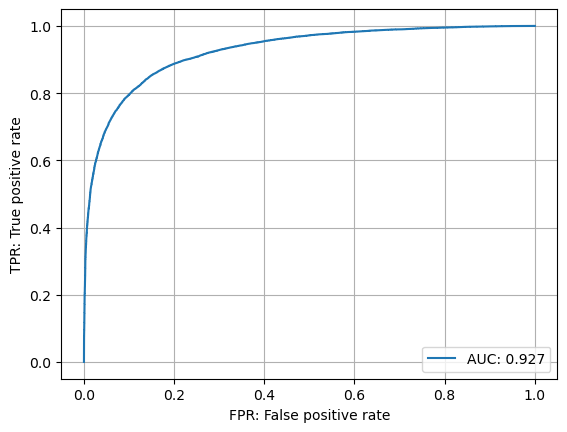

In [21]:
# 精度確認（ROC-AUC曲線）
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
plt.plot(fpr, tpr, label=f"AUC: {auc:.3f}")
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.legend(loc='lower right')
plt.grid()
# plt.savefig("feature_random.png")

* ランダムなfeatureでもかなりの精度が出る
* 記事とタグの関係性(グラフ情報)だけで完結してるのかもしれない

In [ ]:
## 推論して結果を確認してみる

In [31]:
test_data

HeteroData(
  blog={
    node_id=[90313],
    x=[90313, 100],
  },
  tag={ node_id=[4811] },
  (blog, tagged, tag)={
    edge_index=[2, 205242],
    edge_label=[45608],
    edge_label_index=[2, 45608],
  },
  (tag, rev_tagged, blog)={ edge_index=[2, 205242] }
)

In [32]:
test_data['blog'].node_id

tensor([    0,     1,     2,  ..., 90310, 90311, 90312])

In [35]:
test_data["blog", "tagged", "tag"].edge_label_index

tensor([[86298, 15637,  7192,  ..., 45976, 78870, 46288],
        [ 2126,    75,   584,  ...,  3906,  4247,  3517]])

In [34]:
test_data["blog", "tagged", "tag"].edge_label.size()

torch.Size([45608])

In [56]:
torch.count_nonzero(test_data["blog", "tagged", "tag"].edge_label)

tensor(148)

In [44]:

df[df.index == 68654]

,filtered_tags,blog_id,tag_ids
68654,JavaScript GoogleAppsScript GAS 効率化 業務効率化,68654,"[75, 65, 726, 1096, 2443]"


In [46]:
df_tagged[df_tagged.index == 140865]

,blog_id,tag_ids


In [22]:
# 推論用にデータローダー定義
edge_label_index = test_data["blog", "tagged", "tag"].edge_label_index
edge_label = test_data["blog", "tagged", "tag"].edge_label
test_loader = LinkNeighborLoader(
    data=test_data,
    num_neighbors=[20, 10],
    edge_label_index=(("blog", "tagged", "tag"), edge_label_index),
    edge_label=edge_label,
    batch_size=3 * 256,
    shuffle=False,
)

In [30]:
print(test_data["blog", "tagged", "tag"].edge_label_index)
test_data["blog", "tagged", "tag"].edge_label

tensor([[86298, 15637,  7192,  ..., 45976, 78870, 46288],
        [ 2126,    75,   584,  ...,  3906,  4247,  3517]])


tensor([1., 1., 1.,  ..., 0., 0., 0.])

In [23]:
sampled_data = next(iter(test_loader))

In [24]:
sampled_data

HeteroData(
  blog={
    node_id=[12239],
    x=[12239, 100],
    n_id=[12239],
    num_sampled_nodes=[3],
  },
  tag={
    node_id=[2831],
    n_id=[2831],
    num_sampled_nodes=[3],
  },
  (blog, tagged, tag)={
    edge_index=[2, 12699],
    edge_label=[768],
    edge_label_index=[2, 768],
    e_id=[12699],
    num_sampled_edges=[2],
    input_id=[768],
  },
  (tag, rev_tagged, blog)={
    edge_index=[2, 23704],
    e_id=[23704],
    num_sampled_edges=[2],
  }
)

In [25]:
sampled_data["blog", "tagged", "tag"].edge_label

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 

In [ ]:
def infer_positive_tag(model, loader, device):
    model.eval()
    with torch.no_grad():

In [27]:
model.eval()
with torch.no_grad():
    pred = torch.sigmoid(model(sampled_data))

pred

tensor([0.5900, 0.9636, 0.0705, 0.3495, 0.9282, 0.2958, 0.8138, 0.9167, 0.7099,
        0.0492, 0.9855, 0.9288, 0.0775, 0.6805, 0.8657, 0.5547, 0.1005, 0.6912,
        0.6567, 0.7323, 0.2324, 0.8150, 0.3509, 0.0864, 0.3689, 0.1814, 0.1272,
        0.8321, 0.4705, 0.1065, 0.9614, 0.2054, 0.4320, 0.9416, 0.7688, 0.7623,
        0.2325, 0.9555, 0.2194, 0.6326, 0.1053, 0.9011, 0.3255, 0.5052, 0.0264,
        0.5816, 0.5774, 0.8308, 0.9611, 0.7752, 0.8414, 0.4360, 0.9199, 0.3465,
        0.0987, 0.9074, 0.1549, 0.3637, 0.9124, 0.0848, 0.9083, 0.5909, 0.6330,
        0.9132, 0.4268, 0.4136, 0.8983, 0.0294, 0.8816, 0.7265, 0.5101, 0.9538,
        0.6651, 0.6487, 0.8602, 0.4894, 0.6227, 0.8546, 0.7840, 0.9435, 0.9712,
        0.2172, 0.4311, 0.9976, 0.9239, 0.3330, 0.5895, 0.6256, 0.5980, 0.9765,
        0.9974, 0.6346, 0.9913, 0.9681, 0.7022, 0.5785, 0.1836, 0.4360, 0.5847,
        0.4675, 0.7816, 0.9262, 0.9536, 0.1594, 0.9908, 0.6945, 0.7128, 0.9965,
        0.7884, 0.5934, 0.9780, 0.0328, 

In [81]:
auc, y_pred, y_true = validation(model, test_loader, device, optimizer)

100%|██████████| 90/90 [00:01<00:00, 54.12it/s]


In [83]:
# 精度確認（ROC-AUC曲線）
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
plt.plot(fpr, tpr, label=f"AUC: {auc:.3f}")
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.legend(loc='lower right')
plt.grid()

<IPython.core.display.Javascript object>